<h4><center><font color="1F4690">PJJ PENGOLAHAN DATA DENGAN PYTHON <br> <br> Selasa, 14 Juni 2022</font></center></h4>
<div class="alert alert-info"><h1 align="center"><font color="1F4690">Feature Engineering</font></h4></div> 

## Daftar Isi:

* [1. Data Pencilan (Outlier)](#ABC)
* [2. Data Hilang (Missing Value)](#DEF)
* [3. Data Normal](#GEH)
* [3. Penanganan Data yang Hilang](#DEF)
* [4. Penanganan Data Pencilan](#DEF)
* [5. Transforming Variable (Encoding & Binning)](#DEF)
* [6. Deriving Feature from Mathematical Computation](#DEF)
* [7. Deriving Feature from Data and Time](#DEF)

Feature engineering adalah proses menggunakan domain knowledge sehingga meningkatkan kemampuan preediksi dari algoritma machine learning.
* Feature Extraction - membuat feature dari feature-feature yang sudah ada dan menanggalkan feature yang lama untuk mengurangi feature pada dataset.
* Feature Scaling & Selection - proses memilih variabel input untuk model.

![Feature Engineering](https://cdn-coepj.nitrocdn.com/wfkiesSEwVfWQNLPjWDvKANpXMZpUZbv/assets/static/optimized/rev-0aeadd8/wp-content/uploads/2019/07/Screen-Shot-2021-10-18-at-8.48.58-AM-1536x552.png)

# 1. Data Pencilan (Outlier)

## 1.1 Three Sigma Rule

![Sigma](https://miro.medium.com/max/1400/1*IZ2II2HYKeoMrdLU5jW6Dw.png)
$P(a−3σ<X<a+3σ)=0.99730$

Kriteria Outlier untuk **Three Sigma Rule** :
> $|x_K-\bar x|>3\sigma$

Keterangan :
* $x_K$ adalah data ke-$k$, 
* $\bar x$ adalah rata-rata data, 
* $\sigma$ adalah standar deviasi

In [3]:
# PEMBUATAN FUNGSI UNTUK KRITERIA OUTLIER
def three_sigma_outlier (df):
    if (abs(potassium-df['potassium'].mean())>(3*df['potassium'].std())):
        return "Outlier"
    else:
        return "Not Outlier"

In [4]:
type(contoh_series)

pandas.core.series.Series

In [4]:
import pandas as pd
df=pd.read_csv('UScereal.csv')
df.head(8)

,Unnamed: 0,mfr,calories,protein,fat,sodium,fibre,carbo,sugars,shelf,potassium,vitamins
0,100% Bran,N,212.12121,12.121212,3.030303,393.93939,30.303030,15.15152,18.181818,3,848.48485,enriched
1,All-Bran,K,212.12121,12.121212,3.030303,787.87879,27.272727,21.21212,15.151515,3,969.69697,enriched
2,All-Bran with Extra Fiber,K,100.00000,8.000000,0.000000,280.00000,28.000000,16.00000,0.000000,3,660.00000,enriched
3,Apple Cinnamon Cheerios,G,146.66667,2.666667,2.666667,240.00000,2.000000,14.00000,13.333333,1,93.33333,enriched
4,Apple Jacks,K,110.00000,2.000000,0.000000,125.00000,1.000000,11.00000,14.000000,2,30.00000,enriched
5,Basic 4,G,173.33333,4.000000,2.666667,280.00000,2.666667,24.00000,10.666667,3,133.33333,enriched
6,Bran Chex,R,134.32836,2.985075,1.492537,298.50746,5.970149,22.38806,8.955224,1,186.56716,enriched
7,Bran Flakes,P,134.32836,4.477612,0.000000,313.43284,7.462687,19.40299,7.462687,3,283.58209,enriched


In [5]:
# LOAD FUNGSI UNTUK KRITERIA OUTLIER
def three_sigma_outlier (potassium):
    if (abs(potassium-df['potassium'].mean())>(3*df['potassium'].std())):
        return "Outlier"
    else:
        return "Not Outlier"

    # APLIKASI KE TABEL    
df['result_3sigma']=df['potassium'].apply(three_sigma_outlier)
df.head()

,Unnamed: 0,mfr,calories,protein,fat,sodium,fibre,carbo,sugars,shelf,potassium,vitamins,result_3sigma
0,100% Bran,N,212.12121,12.121212,3.030303,393.93939,30.303030,15.15152,18.181818,3,848.48485,enriched,Outlier
1,All-Bran,K,212.12121,12.121212,3.030303,787.87879,27.272727,21.21212,15.151515,3,969.69697,enriched,Outlier
2,All-Bran with Extra Fiber,K,100.00000,8.000000,0.000000,280.00000,28.000000,16.00000,0.000000,3,660.00000,enriched,Not Outlier
3,Apple Cinnamon Cheerios,G,146.66667,2.666667,2.666667,240.00000,2.000000,14.00000,13.333333,1,93.33333,enriched,Not Outlier
4,Apple Jacks,K,110.00000,2.000000,0.000000,125.00000,1.000000,11.00000,14.000000,2,30.00000,enriched,Not Outlier


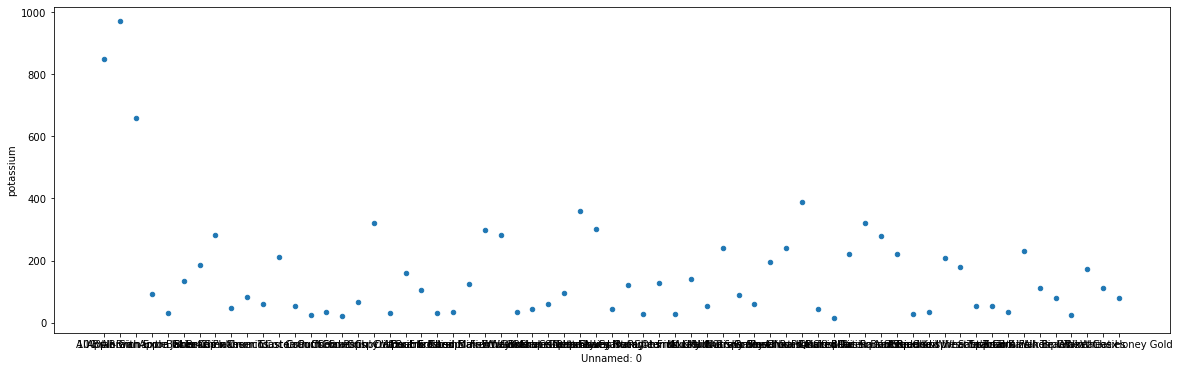

In [6]:
# VISUALISASI OUTLIER
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,6)

df.plot(x ='Unnamed: 0', y='potassium', kind = 'scatter')
plt.show()

In [7]:
# MELIHAT OUTLIER
df.loc[df['result_3sigma']=='Outlier']

,Unnamed: 0,mfr,calories,protein,fat,sodium,fibre,carbo,sugars,shelf,potassium,vitamins,result_3sigma
0,100% Bran,N,212.12121,12.121212,3.030303,393.93939,30.303030,15.15152,18.181818,3,848.48485,enriched,Outlier
1,All-Bran,K,212.12121,12.121212,3.030303,787.87879,27.272727,21.21212,15.151515,3,969.69697,enriched,Outlier


In [8]:
# JIKA HENDAK MEMBUAT DATASET BARU MENGELUARKAN OUTLIER
df_net=df.loc[df['result_3sigma']=='Not Outlier']
df_net.head()

,Unnamed: 0,mfr,calories,protein,fat,sodium,fibre,carbo,sugars,shelf,potassium,vitamins,result_3sigma
2,All-Bran with Extra Fiber,K,100.00000,8.000000,0.000000,280.00000,28.000000,16.00000,0.000000,3,660.00000,enriched,Not Outlier
3,Apple Cinnamon Cheerios,G,146.66667,2.666667,2.666667,240.00000,2.000000,14.00000,13.333333,1,93.33333,enriched,Not Outlier
4,Apple Jacks,K,110.00000,2.000000,0.000000,125.00000,1.000000,11.00000,14.000000,2,30.00000,enriched,Not Outlier
5,Basic 4,G,173.33333,4.000000,2.666667,280.00000,2.666667,24.00000,10.666667,3,133.33333,enriched,Not Outlier
6,Bran Chex,R,134.32836,2.985075,1.492537,298.50746,5.970149,22.38806,8.955224,1,186.56716,enriched,Not Outlier


## 1.2 Hampel Identifier
Kriteria Outlier untuk Hampel Identifier :

> Median Absolute Value from The Median (MADM)

$MADM(x)=1.4826 \times median \{|x_K-x^+|\}$

Keterangan :
* $x_K$ adalah data ke $K$
* $x^+$ adalah median dari data

In [10]:
# BUAT KOLOM UNTUK $x_k-x+$
med=df['potassium'].quantile(0.55)
def abs_med_dev (potassium):
    return abs(potassium-med)
df['amd']=df['potassium'].apply(abs_med_dev)
df.head()

,Unnamed: 0,mfr,calories,protein,fat,sodium,fibre,carbo,sugars,shelf,potassium,vitamins,result_3sigma,amd
0,100% Bran,N,212.12121,12.121212,3.030303,393.93939,30.303030,15.15152,18.181818,3,848.48485,enriched,Outlier,736.48485
1,All-Bran,K,212.12121,12.121212,3.030303,787.87879,27.272727,21.21212,15.151515,3,969.69697,enriched,Outlier,857.69697
2,All-Bran with Extra Fiber,K,100.00000,8.000000,0.000000,280.00000,28.000000,16.00000,0.000000,3,660.00000,enriched,Not Outlier,548.00000
3,Apple Cinnamon Cheerios,G,146.66667,2.666667,2.666667,240.00000,2.000000,14.00000,13.333333,1,93.33333,enriched,Not Outlier,18.66667
4,Apple Jacks,K,110.00000,2.000000,0.000000,125.00000,1.000000,11.00000,14.000000,2,30.00000,enriched,Not Outlier,82.00000


In [11]:
med_abs = df['amd'].quantile(0.50)
def hampel_outlier (potassium):
    madm=1.4826*med_abs
    if (potassium>3*madm):
        return "Outlier"
    else:
        return "Not Outlier"
df['result_hampel']=df['potassium'].apply(hampel_outlier)
df.head()

,Unnamed: 0,mfr,calories,protein,fat,sodium,fibre,carbo,sugars,shelf,potassium,vitamins,result_3sigma,amd,result_hampel
0,100% Bran,N,212.12121,12.121212,3.030303,393.93939,30.303030,15.15152,18.181818,3,848.48485,enriched,Outlier,736.48485,Outlier
1,All-Bran,K,212.12121,12.121212,3.030303,787.87879,27.272727,21.21212,15.151515,3,969.69697,enriched,Outlier,857.69697,Outlier
2,All-Bran with Extra Fiber,K,100.00000,8.000000,0.000000,280.00000,28.000000,16.00000,0.000000,3,660.00000,enriched,Not Outlier,548.00000,Outlier
3,Apple Cinnamon Cheerios,G,146.66667,2.666667,2.666667,240.00000,2.000000,14.00000,13.333333,1,93.33333,enriched,Not Outlier,18.66667,Not Outlier
4,Apple Jacks,K,110.00000,2.000000,0.000000,125.00000,1.000000,11.00000,14.000000,2,30.00000,enriched,Not Outlier,82.00000,Not Outlier


In [12]:
# MELIHAT OUTLIER
df.loc[df['result_hampel']=='Outlier']

,Unnamed: 0,mfr,calories,protein,fat,sodium,fibre,carbo,sugars,shelf,potassium,vitamins,result_3sigma,amd,result_hampel
0,100% Bran,N,212.12121,12.121212,3.030303,393.93939,30.303030,15.15152,18.181818,3,848.48485,enriched,Outlier,736.48485,Outlier
1,All-Bran,K,212.12121,12.121212,3.030303,787.87879,27.272727,21.21212,15.151515,3,969.69697,enriched,Outlier,857.69697,Outlier
2,All-Bran with Extra Fiber,K,100.00000,8.000000,0.000000,280.00000,28.000000,16.00000,0.000000,3,660.00000,enriched,Not Outlier,548.00000,Outlier
30,Grape-Nuts,P,440.00000,12.000000,0.000000,680.00000,12.000000,68.00000,12.000000,3,360.00000,enriched,Not Outlier,248.00000,Outlier
44,Post Nat. Raisin Bran,P,179.10448,4.477612,1.492537,298.50746,8.955224,16.41791,20.895522,3,388.05970,enriched,Not Outlier,276.05970,Outlier


## 1.3 Boxplot Outlier Rule

Kriteria Outlier untuk **Boxplot Outlier Rule** :
* $x_K>x_U+1.5Q$
* $x_K>x_L-1.5Q$

Keterangan :
* $x_K$ adalah data ke-$k$, 
* $x_U$ adalah kuartil ke-$1$ atau disebut kuartil bawah (*lower quartile*), 
* $x_L$ adalah kuartil ke-$3$ atau disebut kuartil bawah (*upper quartile*), 
* $Q$ adalah jangkuan interkuartil (selisih kuartil bawah - kuartil atas) 

In [14]:
# FUNGSI OUTLIER RULE
low_q=df['potassium'].quantile(0.25)
upr_q=df['potassium'].quantile(0.75)
iq_d=df['potassium'].quantile(0.75)-df['potassium'].quantile(0.25)
def boxplot_outlier (potassium):
    if (potassium>upr_q+1.5*iq_d) or (potassium<low_q-1.5*iq_d):
        return "Outlier"
    else:
        return "Not Outlier"

In [15]:
df['result_boxplot']=df['potassium'].apply(boxplot_outlier)
df.head()

,Unnamed: 0,mfr,calories,protein,fat,sodium,fibre,carbo,sugars,shelf,potassium,vitamins,result_3sigma,amd,result_hampel,result_boxplot
0,100% Bran,N,212.12121,12.121212,3.030303,393.93939,30.303030,15.15152,18.181818,3,848.48485,enriched,Outlier,736.48485,Outlier,Outlier
1,All-Bran,K,212.12121,12.121212,3.030303,787.87879,27.272727,21.21212,15.151515,3,969.69697,enriched,Outlier,857.69697,Outlier,Outlier
2,All-Bran with Extra Fiber,K,100.00000,8.000000,0.000000,280.00000,28.000000,16.00000,0.000000,3,660.00000,enriched,Not Outlier,548.00000,Outlier,Outlier
3,Apple Cinnamon Cheerios,G,146.66667,2.666667,2.666667,240.00000,2.000000,14.00000,13.333333,1,93.33333,enriched,Not Outlier,18.66667,Not Outlier,Not Outlier
4,Apple Jacks,K,110.00000,2.000000,0.000000,125.00000,1.000000,11.00000,14.000000,2,30.00000,enriched,Not Outlier,82.00000,Not Outlier,Not Outlier


In [16]:
# MELIHAT OUTLIER
df.loc[df['result_boxplot']=='Outlier']

,Unnamed: 0,mfr,calories,protein,fat,sodium,fibre,carbo,sugars,shelf,potassium,vitamins,result_3sigma,amd,result_hampel,result_boxplot
0,100% Bran,N,212.12121,12.121212,3.030303,393.93939,30.303030,15.15152,18.181818,3,848.48485,enriched,Outlier,736.48485,Outlier,Outlier
1,All-Bran,K,212.12121,12.121212,3.030303,787.87879,27.272727,21.21212,15.151515,3,969.69697,enriched,Outlier,857.69697,Outlier,Outlier
2,All-Bran with Extra Fiber,K,100.00000,8.000000,0.000000,280.00000,28.000000,16.00000,0.000000,3,660.00000,enriched,Not Outlier,548.00000,Outlier,Outlier


> **PERTANYAAN ISENG-ISENG**

> Apakah data yang terdistribusi normal memiliki outlier ?
> Bila ya mengapa, bila tidak mengapa ?

# 2. Normalitas Data

**Apakah semua algoritma machine learning mengharapkan normalitas data ? --> TIDAK**
* Algoritma yang membutuhkan normalisasi : 
    * Algoritma yang bersifat ' curve fitting algorithms' seperti regresi linear/non-linear/logistik, KNN, SVM, Neural Networks, clustering algorithms like k-means clustering etc. 
    * Algoritma yang menggunakan faktorisasi matriks, dekomposisi, dan reduksi dimensi seperti PCA, SVD, Factorization Machines 
* Algoritma yang tidak membutuhkan normalisasi : 
    * tree based algorithms - 
        * CART, 
        * Random Forests, 
        * Gradient Boosted Decision Trees etc

* Hati-hati, perhatikan apanya yang butuh normalisasi ? Apakah regresi linear perlu normalisasi data ? TIDAK! Regresi linear memerlukan normalitas pada sisa residu hasil regresi. 

>> Perlu pemahaman yang tepat terhadap algoritma yang anda gunakan.

## 2.1 QQ Plot

QQ Plot **(quantile-quantile plot)** merupakan instrumen grafis yang membantu untuk menilai apakah suatu dataset memenuhi distribusi teoritikal (distribusi normal atau eksponensial).
Misalkan, bila kita melakukan analisis statistik yang mengasumsikan variabel dependen distribusi normal kita bisa menyandingkan.

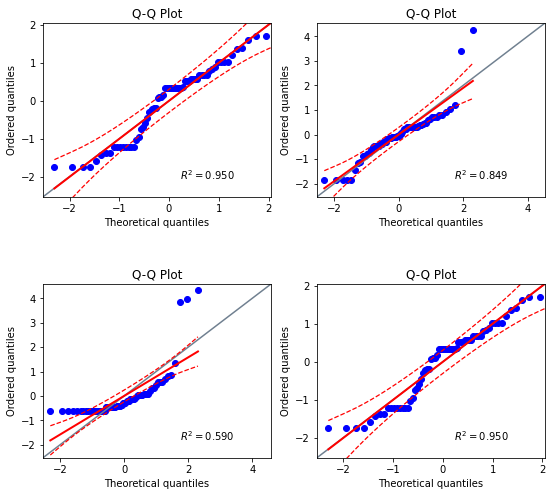

In [36]:
import pingouin as pg
import pandas as pd
import matplotlib.pyplot as plt
fig, ((qplot_sugars, qplot_sodium), (qplot_fibre, qplot_protein)) = plt.subplots(2, 2, figsize=(9, 8))
fig.subplots_adjust(hspace=0.5)
qp_sugars = pg.qqplot(df['sugars'], ax=qplot_sugars, dist='norm')
qp_sodium = pg.qqplot(df['sodium'],ax=qplot_sodium, dist='norm')
qp_fibre = pg.qqplot(df['fibre'], ax=qplot_fibre, dist='norm')
qp_protein = pg.qqplot(df['sugars'], ax=qplot_protein,dist='norm')

# 2. Data Hilang (Missing Value)

Misalkan anda melakukan analisis data terhadap data peminjaman BMN di suatu kantor. Dari daftar peminjaman BMN tersebut anda melihat ada suatu list peminjaman sbb :

| No  | BMN                   | Nama Peminjam | Jumlah Dipinjam |
| --- | --------------------- | ------------- | --------------- |
| 1   | Mobil Avanza          | Budi          | 4               |
| 2   | Laptop Dell           | Ali           | 3               |
| 3   | Proyektor Panasonic   | Iqbal         | 8               |
| 4   | Laptop Asus           | Susi          |                 |
| 5   | Mesin Fotokopi Konica | Ani           | 6               |
| …   | …                     | …             | …               |
| 21  | Laptop Acer           | Rudi          |                 |
| 22  | Mesin Fotokopi        | Ali           | 6               |
| 23  | Proyektor Panasonic   | Mina          | 4               |
| …   | …                     | …             | …               |
| 87  | Mobil Alphard         | Susi          | 3               |
| 88  | Laptop Lenovo         | Mikail        | 9               |
| 100 | Mobil Nissan          | Joni          |                 |

Dari data di atas terlihat ada peminjaman yang hari peminjamannya tidak tercatat. Anda mencari tahu mengapa data tersebut hilang. Operator BMN mengatakan bahwa memang sekitar 5% pencatatan lupa dicatat jumlah barang yang dipinjam.
Anda menanyakan apakah 5% tersebut spesifik pada jenis barang tertentu yang dipinjam atau user tertentu. Petugas mengatakan tidak, itu terjadi merata di seluruh pencatatan.

* **Missing Completely at Random (MCAR)** </br> 
Dengan mengasumsikan pernyataan petugas benar, maka kasus di atas dapat dianggap sebagai MCAR, yakni data yang hilang tidak memiliki relasi dengan variabel yang sedang diobservasi.
* **Missing at Random (MAR)** </br>
Data tidak hilang secara acak tetapi bisa diprediksi dari variabel-variabel lain yang sedang diobservasi maka kasus tersebut disebut sebagai MAR. Misalkan, data yang hilang bisa diprediksi dari jenis BMN yang diprediksi atau dari orang yang meminjam.
* **Missing Not At Random (MNAR)** </br>
Bila memiliki pola yang dapat dijelaskan namun diluar variabel yang diobservasi disebut MNAR . Misalkan, data yang hilang dapat diprediksi dari apakah pada tanggal peminjaman hari cerah atau hujan, tetapi kita tidak mengobservasi hal tersebut.

Lebih jauh tentang ini :
* [Youtube - Missing Data Analysis, Mplus Short Course](https://www.youtube.com/watch?v=gdKTJdrqtOI)

In [ ]:
Cara untuk melihat data kosong :
    * Menggunakan library missingno
    * menggunakan df.isnull()

In [ ]:
df_titanic.isnull().sum()

In [ ]:
# visualiasi missing value dengan bantuan library
import missingno as msno
msno.matrix(df_titanic, figsize=(10, 6))

In [1]:
### GUNAKAN MATRIKS KORELASI UNTUK MELIHAT KIRA-KIRA APAKAH ADA VARIABEL YANG BISA MENJELASKAN 
### HILANGNYA DATA PADA TITANIC.

# 3. Penanganan atas Data yang Hilang

In [ ]:
# Imputasi
Imputation berarti menggunakan variabel-variabel data yang ada untuk memprediksi data yang hilang.

# Single Imputation
# Multiple Imputation

In [ ]:
Removing observations with missing data
Performing mean or median imputation
Implementing mode or frequent category imputation
Replacing missing values with an arbitrary number
Capturing missing values in a bespoke category
Replacing missing values with a value at the end of the distribution
Implementing random sample imputation
Adding a missing value indicator variable
Performing multivariate imputation by chained equations
Assembling an imputation pipeline with scikit-learn
Assembling an imputation pipeline with Feature-engine

In [ ]:
* Complete-case analysis (listwise deletion) is the default way of handling
incomplete data in many statistical packages, including SPSS, SAS and Stata.


## 3.1 Listwise Deletion

Pada listwise deletion suatu row akan dhihapus bila salah satu variabel memiliki nilai yang hilang. 

In [ ]:
train_1 = train.copy()
train_1.dropna()

## 3.2 Pairwise Deletion

Parwise Deletion digunakan saat data yang hilang completely at random (MCAR). Pada pairwise deletion, only the missing values are deleted.

In [9]:
import pandas as pd
data=pd.read_csv("airquality.csv", index_col=0)
data.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
1,41.0,190.0,7.4,67,5,1
2,36.0,118.0,8.0,72,5,2
3,12.0,149.0,12.6,74,5,3
4,18.0,313.0,11.5,62,5,4
5,NaN,NaN,14.3,56,5,5


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153 entries, 1 to 153
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 8.4 KB


In [16]:
data_net = data.copy()
data_net.dropna()

,Ozone,Solar.R,Wind,Temp,Month,Day
1,41.0,190.0,7.4,67,5,1
2,36.0,118.0,8.0,72,5,2
3,12.0,149.0,12.6,74,5,3
4,18.0,313.0,11.5,62,5,4
7,23.0,299.0,8.6,65,5,7
...,...,...,...,...,...,...
148,14.0,20.0,16.6,63,9,25
149,30.0,193.0,6.9,70,9,26
151,14.0,191.0,14.3,75,9,28
152,18.0,131.0,8.0,76,9,29


In [18]:
data_net.info()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153 entries, 1 to 153
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 8.4 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 153 entries, 1 to 153
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 8.4 KB


## 3.3 Mean Imputation

mengganti data yang hilang dengan menggunakan rata-rata dari data variabel (exclude data yang hilang).

In [ ]:
# fungsi fillna di pandas dapat digunakan untuk imputasi missing values
# taruh hasilnya di variable baru untuk mempermudah pengamatan
df_titanic['Age_mean_uni'] = df_titanic.Age.fillna(df_titanic.Age.mean())
df_titanic['Age_median_uni'] = df_titanic.Age.fillna(df_titanic.Age.median())

In [ ]:

# mengetahui mean per kelompok sex, kita menggunakan groupby
df_grouped = df_titanic[['Sex', 'Age']].groupby(['Sex']).mean()
df_grouped
# imputasi untuk male group

# filter kondisi 
condition = df_titanic['Sex'] == 'male'

# tangkap nilai mean untuk laki2
mean_male = df_grouped.loc['male','Age']

# imputasi
df_titanic.loc[condition, 'Age_mean_multi'] = df_titanic.loc[condition,'Age'].fillna(mean_male)

## 3.4 Multivariate Imputation via Chained Equations (MICE)

List of R Packages
MICE
Amelia
missForest
Hmisc
mi

In [ ]:
Overview
Learn the methods to impute missing values in R for data cleaning and exploration
Understand how to use packages like amelia, missForest, hmisc, mi and mice which use bootstrap sampling and predictive modeling
 

Introduction
Missing values are considered to be the first obstacle in predictive modeling. Hence, it’s important to master the methods to overcome them. Though, some machine learning algorithms claim to treat them intrinsically, but who knows how good it happens inside the ‘black box’.

The choice of method to impute missing values, largely influences the model’s predictive ability. In most statistical analysis methods, listwise deletion is the default method used to impute missing values. But, it not as good since it leads to information loss.

Do you know R has robust packages for missing value imputations?

Yes! R Users have something to cheer about. We are endowed with some incredible R packages for missing values imputation. These packages arrive with some inbuilt functions and a simple syntax to impute missing data at once. Some packages are known best working with continuous variables and others for categorical. With this article, you can make a better decision choose the best suited package.

In this article, I’ve listed 5 R packages popularly known for missing value imputation. There might be more packages. But, I decided to focus on these ones. I’ve tried to explain the concepts in simplistic manner with practice examples in R.

Loading Image
Learn | Write | Earn
Assured INR 2000 ($26) for every published article!
missing values imputation, powerful R packages
Tutorial on 5 Powerful R Packages used for imputing missing values

 

List of R Packages
MICE
Amelia
missForest
Hmisc
mi
 

MICE Package
MICE (Multivariate Imputation via Chained Equations) is one of the commonly used package by R users. Creating multiple imputations as compared to a single imputation (such as mean) takes care of uncertainty in missing values.

MICE assumes that the missing data are Missing at Random (MAR), which means that the probability that a value is missing depends only on observed value and can be predicted using them. It imputes data on a variable by variable basis by specifying an imputation model per variable.

For example: Suppose we have X1, X2….Xk variables. If X1 has missing values, then it will be regressed on other variables X2 to Xk. The missing values in X1 will be then replaced by predictive values obtained. Similarly, if X2 has missing values, then X1, X3 to Xk variables will be used in prediction model as independent variables. Later, missing values will be replaced with predicted values.

By default, linear regression is used to predict continuous missing values. Logistic regression is used for categorical missing values. 

![DDD](https://editor.analyticsvidhya.com/uploads/123801_qE8g5nqa2GNT_2tRFag8aw.jpeg)

https://campus.datacamp.com/courses/dealing-with-missing-data-in-python/advanced-imputation-techniques?ex=1

# 4. Penanganan Outlier

Ada tiga metode dasar untuk menangani data pencilan :
1. **Menghapus Pencilan** 
2. **Mengganti Nilai Pencilan** 
3. **Mengestimasi Nilai Pencilan**

Untuk 1 dan 3 bisa dilakukan dengan metode penanganan yang sama dengan penanganan data yang hilang. Untuk metode ke-2 ada beberapa cara yang dapat dilakukan, salah satunya adalah Winsorization.

## 4.1 Winsorization

merupakan salah satu metode transformasi statistik dengan membatasi nilai-nilai ekstrim data.
Disebut Winsorization karena metode ini ditemukan oleh biostatistisi Charles P. Winsor (1895–1951).
Strategi umum dari Winsorization adalah dengan menspesifikasi persentil data.
Winsorization 90% berarti 
* mengganti semua data di bawah 5% persentil menjadi 5%
* mengganti semua data di atas 95% persentil menjadi 95%

In [29]:
# Misalkan kita memiliki list data :
dataA=[3, 14, 16, 16, 17, 29, 34, 36, 39, 47, 59, 64, 65, 66, 68, 79, 91, 98]
import numpy as np
q05=np.quantile(dataA, .05)
q95=np.quantile(dataA, .95)
print(q05)
print(q95)

12.350000000000001
92.04999999999998


Maka :
* semua data di bawah 12 akan diganti dengan 12 
* semua data di atas 92 akan diganti dengan 92

## 4.2 Estimasi/Penggantian Outlier Multivariate

*(dibahas belakangan saat mata pelajaran machine learning)

Deteksi outlier bedasarkan pengamatan terhadap lebih dari 1 features biasa dikenal dengan multivariate outlier detections.
Dalam kasus ini kita coba mengkoreksi data outlier Fare dengan bantuan dari variable lain yakni Age.
Kemudian kita melihat apakah ada outlier dengan melihat kerapatan data menggunakan metode Density-Based Spatial Clustering of Applications with Noise (DBSCAN).

# 5. Transformasi Variabel

![Binning vs Encoding](https://miro.medium.com/max/1400/1*MAr4rWj6zw0Rdo01ecZu1A.png)

## 5.1 Encoding

library LabelEncoder.
dictionary {}.
df.Series.map().
dst.

In [ ]:
import pandas as pd

city_id = [100, 101, 102, 103, 104, 105, 106]
city_name = ['Jakarta', 'Bandung', 'Surabaya', 'Pontianak', 'Medan', 'Makassar', 'Jayapura']
df = pd.DataFrame(list(zip(city_id, city_name)), columns=['ID', 'City'])
df

In [ ]:
### 5.2 Label Encoding
convertible -> 0
hardtop -> 1
hatchback -> 2
sedan -> 3
wagon -> 4
obj_df["body_style_cat"] = obj_df["body_style"].cat.codes
obj_df.head()

In [ ]:
# Custom Binary Encoding

Depending on the data set, you may be able to use some combination of label encoding and one hot encoding to create a binary column that meets your needs for further analysis.
obj_df["OHC_Code"] = np.where(obj_df["engine_type"].str.contains("ohc"), 1, 0)
https://pbpython.com/categorical-encoding.html

In [ ]:
encoded = pd.get_dummies(df, prefix='City')
encoded

## 5.2. Binning

mengkonversi data numerical menjadi categorical, dengan menggunakan range.

In [ ]:
qcut
The pandas documentation describes qcut as a “Quantile-based discretization function.” This basically means that qcut tries to divide up the underlying data into equal sized bins. The function defines the bins using percentiles based on the distribution of the data, not the actual numeric edges of the bins.
qcut()
Selain fungsi cut(), ada juga fungsi qcut() yang dapat digunakan untuk melakukan binning data. Menurut dokumentasi pandas, qcut digambarkan sebagai Quantile-based discretization function. Singkatnya fungsi qcut() ini akan membagi data ke dalam jumlah yang sama. Karena itu, jarak untuk masing-masing bin boleh jadi berbeda satu sama lain.

Di Python, jika kita akan melakukan binning data menjadi 3 bin menggunakan qcut() dapat ditulis sebagai berikut.

data['Harga_binned'] = pd.qcut(data['Harga'], 3)

In [34]:
import pandas as pd
df=pd.read_csv('UScereal.csv')
df.head(4)

,Unnamed: 0,mfr,calories,protein,fat,sodium,fibre,carbo,sugars,shelf,potassium,vitamins
0,100% Bran,N,212.12121,12.121212,3.030303,393.93939,30.303030,15.15152,18.181818,3,848.48485,enriched
1,All-Bran,K,212.12121,12.121212,3.030303,787.87879,27.272727,21.21212,15.151515,3,969.69697,enriched
2,All-Bran with Extra Fiber,K,100.00000,8.000000,0.000000,280.00000,28.000000,16.00000,0.000000,3,660.00000,enriched
3,Apple Cinnamon Cheerios,G,146.66667,2.666667,2.666667,240.00000,2.000000,14.00000,13.333333,1,93.33333,enriched


# 6. Menciptakan Feature dari Data Waktu

In [ ]:
Extracting date and time parts from a datetime variable
Deriving representations of the year and month
Creating representations of day and week
Extracting time parts from a time variable
Capturing the elapsed time between datetime variables
Working with time in different time zones

In [40]:
import pandas as pd
rng_ = pd.date_range('2022-03-05', periods=20, freq='T')
df = pd.DataFrame({'date': rng_})
df.head()

,date
0,2022-03-05 00:00:00
1,2022-03-05 00:01:00
2,2022-03-05 00:02:00
3,2022-03-05 00:03:00
4,2022-03-05 00:04:00


In [41]:
df.dtypes

date    datetime64[ns]
dtype: object

In [42]:
df['date_part'] = df['date'].dt.date
df['date_part'].head()

0    2022-03-05
1    2022-03-05
2    2022-03-05
3    2022-03-05
4    2022-03-05
Name: date_part, dtype: object

In [43]:
df['time_part'] = df['date'].dt.time
df['time_part'].head()

0    00:00:00
1    00:01:00
2    00:02:00
3    00:03:00
4    00:04:00
Name: time_part, dtype: object

In [ ]:
df['datetime_var'] = pd.to_datetime(df['date_var'])
df

In [ ]:
df['date'] = df['datetime_var'].dt.date
df['time'] = df['datetime_var'].dt.time
df

In [ ]:
df['year'] = df['date'].dt.year
df.head()

In [ ]:
df['quarter'] = df['date'].dt.quarter
df.head()

In [ ]:
df['day_mo'] = df['date'].dt.day
df.head()

In [ ]:
df['day_week'] = df['date'].dt.dayofweek
df.head()

In [ ]:
df['elapsed_days'] = (df['date2'] - df['date1']).dt.days
df.head()

In [44]:
df = pd.DataFrame()
df['time1'] = pd.concat([
    pd.Series(
        pd.date_range(
            start='2015-06-10 09:00', freq='H', periods=3,
            tz='Europe/Berlin')),
    pd.Series(
        pd.date_range(
            start='2015-09-10 09:00', freq='H', periods=3,
            tz='US/Central'))
    ], axis=0)

In [45]:
df

,time1
0,2015-06-10 09:00:00+02:00
1,2015-06-10 10:00:00+02:00
2,2015-06-10 11:00:00+02:00
0,2015-09-10 09:00:00-05:00
1,2015-09-10 10:00:00-05:00
2,2015-09-10 11:00:00-05:00


In [ ]:
df['time1_london'] = df['time1_utc'].dt.tz_convert('Europe/London')
df['time2_berlin'] = df['time1_utc'].dt.tz_convert('Europe/Berlin')
df[['time1_london', 'time2_berlin']]

# 7. Menciptakan Feature dari Komputasi Matematis

In [ ]:
Combining multiple features with statistical operations
Combining pairs of features with mathematical functions
Performing polynomial expansion
Deriving new features with decision trees
Carrying out PCA